<a href="https://colab.research.google.com/gist/JosephAyo/5f7d72f827196d4e586806898f565f8c/jabref-prs-comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style("whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/research/2025-08-12/jabref_prs-detection.csv'

detection_df = pd.read_csv(file_path)

print("Data loaded successfully.")
detection_df

Data loaded successfully.


,pr_id,entry_key,entry_type,input_text,zerogpt_response
0,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_original,original,<!-- \nThis PR improves the user interface by ...,"{""success"": true, ""code"": 200, ""message"": ""det..."
1,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_generated_zero_shot,generated_zero_shot,Fix bug by properly disabling the 'Save All' a...,"{""success"": true, ""code"": 200, ""message"": ""det..."
2,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_generated_one_shot,generated_one_shot,Fix bugs by properly disabling menu items and ...,"{""success"": true, ""code"": 200, ""message"": ""det..."
3,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_generated_few_shot,generated_few_shot,Fixes a bug in MainMenu where the 'Save All' a...,"{""success"": true, ""code"": 200, ""message"": ""det..."
4,PR_kwDOAQ0TF86QCqNS,PR_kwDOAQ0TF86QCqNS_original,original,Trigger: https://github.com/JabRef/jabref/pull...,"{""success"": true, ""code"": 200, ""message"": ""det..."
...,...,...,...,...,...
115,PR_kwDOAQ0TF86fi2fR,PR_kwDOAQ0TF86fi2fR_generated_few_shot,generated_few_shot,Fix FileUtil.relativize to be symlink-aware by...,"{""success"": true, ""code"": 200, ""message"": ""det..."
116,PR_kwDOAQ0TF86ZjLje,PR_kwDOAQ0TF86ZjLje_original,original,Closes #13275 \nthe ``--output`` option is mor...,"{""success"": true, ""code"": 200, ""message"": ""det..."
117,PR_kwDOAQ0TF86ZjLje,PR_kwDOAQ0TF86ZjLje_generated_zero_shot,generated_zero_shot,Modify the CLI usage footer in JabKit to inclu...,"{""success"": true, ""code"": 200, ""message"": ""det..."
118,PR_kwDOAQ0TF86ZjLje,PR_kwDOAQ0TF86ZjLje_generated_one_shot,generated_one_shot,Modify the CLI help output to include the expo...,"{""success"": true, ""code"": 200, ""message"": ""det..."


In [6]:
entry_type_counts = detection_df.groupby('entry_type').size().reset_index(name='count')
print(entry_type_counts)

            entry_type  count
0   generated_few_shot     30
1   generated_one_shot     30
2  generated_zero_shot     30
3             original     30


In [7]:
file_path = '/content/drive/My Drive/research/2025-08-12/sample_by_state.csv'

full_pr_df = pd.read_csv(file_path)

full_pr_df['created_at'] = pd.to_datetime(full_pr_df['created_at'])
full_pr_df['updated_at'] = pd.to_datetime(full_pr_df['updated_at'])

print("Data loaded successfully.")
print(f"\ncount of full_pr_df dataframe:", full_pr_df.shape[0])

full_pr_df.head()

Data loaded successfully.

count of full_pr_df dataframe: 30


,state,Unnamed: 1,Unnamed: 0,id,pull_number,title,url,comments_count,closed,closed_by,...,commits_count,changed_files_count,additions_count,deletions_count,author_name,author_url,search_repository,additions,deletions,pr_total_size_bytes
0,CLOSED,5213,7312,PR_kwDOAQ0TF85-Zpgh,11927,fix bug,https://github.com/JabRef/jabref/pull/11927,2,True,lzmmxh,...,1,2,24,3,lzmmxh,https://github.com/lzmmxh,JabRef/jabref,24,3,40725
1,CLOSED,5839,8050,PR_kwDOAQ0TF86QCqNS,12824,Relax constraint on valid checklist states,https://github.com/JabRef/jabref/pull/12824,5,True,subhramit,...,1,1,1,1,subhramit,https://github.com/subhramit,JabRef/jabref,1,1,17686
2,CLOSED,3760,5470,PR_kwDOAQ0TF85AEMio,9212,Bump lucene-queries from 9.3.0 to 9.4.0,https://github.com/JabRef/jabref/pull/9212,1,True,dependabot,...,1,1,2,2,dependabot,https://github.com/apps/dependabot,JabRef/jabref,2,2,26862
3,CLOSED,3923,5686,PR_kwDOAQ0TF85KWoT2,9632,Bump org.antlr:antlr4-runtime from 4.9.3 to 4....,https://github.com/JabRef/jabref/pull/9632,1,True,Siedlerchr,...,1,1,1,1,dependabot,https://github.com/apps/dependabot,JabRef/jabref,1,1,26905
4,CLOSED,4576,6524,PR_kwDOAQ0TF85eDAbJ,10600,issue 10450,https://github.com/JabRef/jabref/pull/10600,1,True,Siedlerchr,...,1,1,3,0,ChenyangGuan-anu,https://github.com/ChenyangGuan-anu,JabRef/jabref,3,0,235


In [8]:
print("Complete PR details Columns:", full_pr_df.columns.tolist())


Complete PR details Columns: ['state', 'Unnamed: 1', 'Unnamed: 0', 'id', 'pull_number', 'title', 'url', 'comments_count', 'closed', 'closed_by', 'closed_at', 'merged', 'merged_by', 'merged_at', 'body', 'created_at', 'updated_at', 'repository', 'repository_name_with_owner', 'repository_stargazer_count', 'repository_watcher_count', 'repository_is_fork', 'repository_languages', 'merge_commit', 'labels', 'commits_count', 'changed_files_count', 'additions_count', 'deletions_count', 'author_name', 'author_url', 'search_repository', 'additions', 'deletions', 'pr_total_size_bytes']


In [9]:
# Remove duplicates from detection_df based on 'pr_id' and 'entry_type'
detection_df_unique = detection_df.drop_duplicates(subset=['pr_id', 'entry_type'])
print(f"\ncount of detection_df dataframe:", detection_df.shape[0])
print(f"\ncount of detection_df_unique dataframe:", detection_df_unique.shape[0])

# Drop duplicates from full_pr_df based on 'id'
full_pr_df_unique = full_pr_df.drop_duplicates(subset=['id'])
print(f"\ncount of full_pr_df dataframe:", full_pr_df.shape[0])
print(f"\ncount of full_pr_df_unique dataframe:", full_pr_df_unique.shape[0])

# Group by 'entry_type' and create separate dataframes
grouped = detection_df_unique.groupby('entry_type')
#  generated_few_shot, generated_one_shot, generated_zero_shot, original

# Create a dictionary to store the separate dataframes
entry_type_dfs = {}

for entry_type, group_df in grouped:
    # Rename the 'pr_id' column to 'id' to match the 'full_pr_df_unique' for merging
    group_df = group_df.rename(columns={'pr_id': 'id'})
    # Merge with full_pr_df_unique to append attributes
    merged_df = pd.merge(group_df, full_pr_df_unique, on='id', how='left')
    entry_type_dfs[entry_type] = merged_df

# Display the head of each merged dataframe
for entry_type, df in entry_type_dfs.items():
    print(f"\ncount of {entry_type} dataframe:", df.shape[0])
    print(f"\nHead of {entry_type} dataframe:")
    display(df.head())


count of detection_df dataframe: 120

count of detection_df_unique dataframe: 120

count of full_pr_df dataframe: 30

count of full_pr_df_unique dataframe: 30

count of generated_few_shot dataframe: 30

Head of generated_few_shot dataframe:


,id,entry_key,entry_type,input_text,zerogpt_response,state,Unnamed: 1,Unnamed: 0,pull_number,title,...,commits_count,changed_files_count,additions_count,deletions_count,author_name,author_url,search_repository,additions,deletions,pr_total_size_bytes
0,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_generated_few_shot,generated_few_shot,Fixes a bug in MainMenu where the 'Save All' a...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5213,7312,11927,fix bug,...,1,2,24,3,lzmmxh,https://github.com/lzmmxh,JabRef/jabref,24,3,40725
1,PR_kwDOAQ0TF86QCqNS,PR_kwDOAQ0TF86QCqNS_generated_few_shot,generated_few_shot,Relax the regex constraint on valid checklist ...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5839,8050,12824,Relax constraint on valid checklist states,...,1,1,1,1,subhramit,https://github.com/subhramit,JabRef/jabref,1,1,17686
2,PR_kwDOAQ0TF85AEMio,PR_kwDOAQ0TF85AEMio_generated_few_shot,generated_few_shot,Bumps the version of the Lucene Queries depend...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3760,5470,9212,Bump lucene-queries from 9.3.0 to 9.4.0,...,1,1,2,2,dependabot,https://github.com/apps/dependabot,JabRef/jabref,2,2,26862
3,PR_kwDOAQ0TF85KWoT2,PR_kwDOAQ0TF85KWoT2_generated_few_shot,generated_few_shot,Bumps the dependency org.antlr:antlr4-runtime ...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3923,5686,9632,Bump org.antlr:antlr4-runtime from 4.9.3 to 4....,...,1,1,1,1,dependabot,https://github.com/apps/dependabot,JabRef/jabref,1,1,26905
4,PR_kwDOAQ0TF85eDAbJ,PR_kwDOAQ0TF85eDAbJ_generated_few_shot,generated_few_shot,Adds a new file `Issue10450.txt` documenting i...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,4576,6524,10600,issue 10450,...,1,1,3,0,ChenyangGuan-anu,https://github.com/ChenyangGuan-anu,JabRef/jabref,3,0,235



count of generated_one_shot dataframe: 30

Head of generated_one_shot dataframe:


,id,entry_key,entry_type,input_text,zerogpt_response,state,Unnamed: 1,Unnamed: 0,pull_number,title,...,commits_count,changed_files_count,additions_count,deletions_count,author_name,author_url,search_repository,additions,deletions,pr_total_size_bytes
0,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_generated_one_shot,generated_one_shot,Fix bugs by properly disabling menu items and ...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5213,7312,11927,fix bug,...,1,2,24,3,lzmmxh,https://github.com/lzmmxh,JabRef/jabref,24,3,40725
1,PR_kwDOAQ0TF86QCqNS,PR_kwDOAQ0TF86QCqNS_generated_one_shot,generated_one_shot,Relaxed the constraint on valid checklist stat...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5839,8050,12824,Relax constraint on valid checklist states,...,1,1,1,1,subhramit,https://github.com/subhramit,JabRef/jabref,1,1,17686
2,PR_kwDOAQ0TF85AEMio,PR_kwDOAQ0TF85AEMio_generated_one_shot,generated_one_shot,Bump lucene-queries dependency from version 9....,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3760,5470,9212,Bump lucene-queries from 9.3.0 to 9.4.0,...,1,1,2,2,dependabot,https://github.com/apps/dependabot,JabRef/jabref,2,2,26862
3,PR_kwDOAQ0TF85KWoT2,PR_kwDOAQ0TF85KWoT2_generated_one_shot,generated_one_shot,Bump org.antlr:antlr4-runtime dependency from ...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3923,5686,9632,Bump org.antlr:antlr4-runtime from 4.9.3 to 4....,...,1,1,1,1,dependabot,https://github.com/apps/dependabot,JabRef/jabref,1,1,26905
4,PR_kwDOAQ0TF85eDAbJ,PR_kwDOAQ0TF85eDAbJ_generated_one_shot,generated_one_shot,Adds a new file Issue10450.txt documenting the...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,4576,6524,10600,issue 10450,...,1,1,3,0,ChenyangGuan-anu,https://github.com/ChenyangGuan-anu,JabRef/jabref,3,0,235



count of generated_zero_shot dataframe: 30

Head of generated_zero_shot dataframe:


,id,entry_key,entry_type,input_text,zerogpt_response,state,Unnamed: 1,Unnamed: 0,pull_number,title,...,commits_count,changed_files_count,additions_count,deletions_count,author_name,author_url,search_repository,additions,deletions,pr_total_size_bytes
0,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_generated_zero_shot,generated_zero_shot,Fix bug by properly disabling the 'Save All' a...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5213,7312,11927,fix bug,...,1,2,24,3,lzmmxh,https://github.com/lzmmxh,JabRef/jabref,24,3,40725
1,PR_kwDOAQ0TF86QCqNS,PR_kwDOAQ0TF86QCqNS_generated_zero_shot,generated_zero_shot,This pull request relaxes the constraint on va...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5839,8050,12824,Relax constraint on valid checklist states,...,1,1,1,1,subhramit,https://github.com/subhramit,JabRef/jabref,1,1,17686
2,PR_kwDOAQ0TF85AEMio,PR_kwDOAQ0TF85AEMio_generated_zero_shot,generated_zero_shot,This pull request updates the lucene-queries d...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3760,5470,9212,Bump lucene-queries from 9.3.0 to 9.4.0,...,1,1,2,2,dependabot,https://github.com/apps/dependabot,JabRef/jabref,2,2,26862
3,PR_kwDOAQ0TF85KWoT2,PR_kwDOAQ0TF85KWoT2_generated_zero_shot,generated_zero_shot,Updated the org.antlr:antlr4-runtime dependenc...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3923,5686,9632,Bump org.antlr:antlr4-runtime from 4.9.3 to 4....,...,1,1,1,1,dependabot,https://github.com/apps/dependabot,JabRef/jabref,1,1,26905
4,PR_kwDOAQ0TF85eDAbJ,PR_kwDOAQ0TF85eDAbJ_generated_zero_shot,generated_zero_shot,Add Issue10450.txt documenting the lack of fun...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,4576,6524,10600,issue 10450,...,1,1,3,0,ChenyangGuan-anu,https://github.com/ChenyangGuan-anu,JabRef/jabref,3,0,235



count of original dataframe: 30

Head of original dataframe:


,id,entry_key,entry_type,input_text,zerogpt_response,state,Unnamed: 1,Unnamed: 0,pull_number,title,...,commits_count,changed_files_count,additions_count,deletions_count,author_name,author_url,search_repository,additions,deletions,pr_total_size_bytes
0,PR_kwDOAQ0TF85-Zpgh,PR_kwDOAQ0TF85-Zpgh_original,original,<!-- \nThis PR improves the user interface by ...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5213,7312,11927,fix bug,...,1,2,24,3,lzmmxh,https://github.com/lzmmxh,JabRef/jabref,24,3,40725
1,PR_kwDOAQ0TF86QCqNS,PR_kwDOAQ0TF86QCqNS_original,original,Trigger: https://github.com/JabRef/jabref/pull...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,5839,8050,12824,Relax constraint on valid checklist states,...,1,1,1,1,subhramit,https://github.com/subhramit,JabRef/jabref,1,1,17686
2,PR_kwDOAQ0TF85AEMio,PR_kwDOAQ0TF85AEMio_original,original,Bumps lucene-queries from 9.3.0 to 9.4.0.\n\n\...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3760,5470,9212,Bump lucene-queries from 9.3.0 to 9.4.0,...,1,1,2,2,dependabot,https://github.com/apps/dependabot,JabRef/jabref,2,2,26862
3,PR_kwDOAQ0TF85KWoT2,PR_kwDOAQ0TF85KWoT2_original,original,Bumps [org.antlr:antlr4-runtime](https://githu...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,3923,5686,9632,Bump org.antlr:antlr4-runtime from 4.9.3 to 4....,...,1,1,1,1,dependabot,https://github.com/apps/dependabot,JabRef/jabref,1,1,26905
4,PR_kwDOAQ0TF85eDAbJ,PR_kwDOAQ0TF85eDAbJ_original,original,No fix for #10450 \nThis issue is indeed an is...,"{""success"": true, ""code"": 200, ""message"": ""det...",CLOSED,4576,6524,10600,issue 10450,...,1,1,3,0,ChenyangGuan-anu,https://github.com/ChenyangGuan-anu,JabRef/jabref,3,0,235


In [ ]:
# Define a helper function to safely load JSON, handling potential errors
def safe_loads(json_str):
    try:
        return json.loads(json_str)
    except (json.JSONDecodeError, TypeError):
        # Return an empty dictionary if JSON is invalid or value is not a string
        return {}

In [10]:
def analyze_dataframe(df, entry_type):
    total_prs = len(df)
    total_repos = df['repository_name_with_owner'].nunique()
    # Check if 'created_at' column exists and is not empty before calling min/max
    date_range_start = df['created_at'].min().strftime('%Y-%m-%d') if not df['created_at'].empty else "N/A"
    date_range_end = df['created_at'].max().strftime('%Y-%m-%d') if not df['created_at'].empty else "N/A"


    print(f"\n--- Dataset Overview ({entry_type}) ---")
    print(f"Total Pull Requests: {total_prs:,}")
    print(f"Total Repositories: {total_repos}")
    print(f"Date Range: {date_range_start} to {date_range_end}")

    # Calculate the percentage of PRs with an empty input_text
    empty_input_texts_count = (df['input_text'] == '').sum()
    percentage_empty = (empty_input_texts_count / total_prs) * 100 if total_prs > 0 else 0

    # Calculate the length of each input_text
    df['input_text_length'] = df['input_text'].str.len()

    print(f"--- PR Text Analysis ({entry_type}) ---")
    print(f"PRs with empty text: {empty_input_texts_count:,} ({percentage_empty:.2f}%)")
    print(f"\nStatistics for Text Length (in characters) ({entry_type}):")
    print(df['input_text_length'].describe())


# Apply the analysis function to each dataframe in the dictionary
for entry_type, df in entry_type_dfs.items():
    analyze_dataframe(df, entry_type)


--- Dataset Overview (generated_few_shot) ---
Total Pull Requests: 30
Total Repositories: 1
Date Range: 2016-04-22 to 2025-07-27
--- PR Text Analysis (generated_few_shot) ---
PRs with empty text: 0 (0.00%)

Statistics for Text Length (in characters) (generated_few_shot):
count      30.000000
mean      507.633333
std       330.907267
min       108.000000
25%       238.500000
50%       448.000000
75%       693.750000
max      1307.000000
Name: input_text_length, dtype: float64

--- Dataset Overview (generated_one_shot) ---
Total Pull Requests: 30
Total Repositories: 1
Date Range: 2016-04-22 to 2025-07-27
--- PR Text Analysis (generated_one_shot) ---
PRs with empty text: 0 (0.00%)

Statistics for Text Length (in characters) (generated_one_shot):
count      30.000000
mean      535.400000
std       301.239234
min       131.000000
25%       256.750000
50%       559.000000
75%       800.250000
max      1152.000000
Name: input_text_length, dtype: float64

--- Dataset Overview (generated_zero_

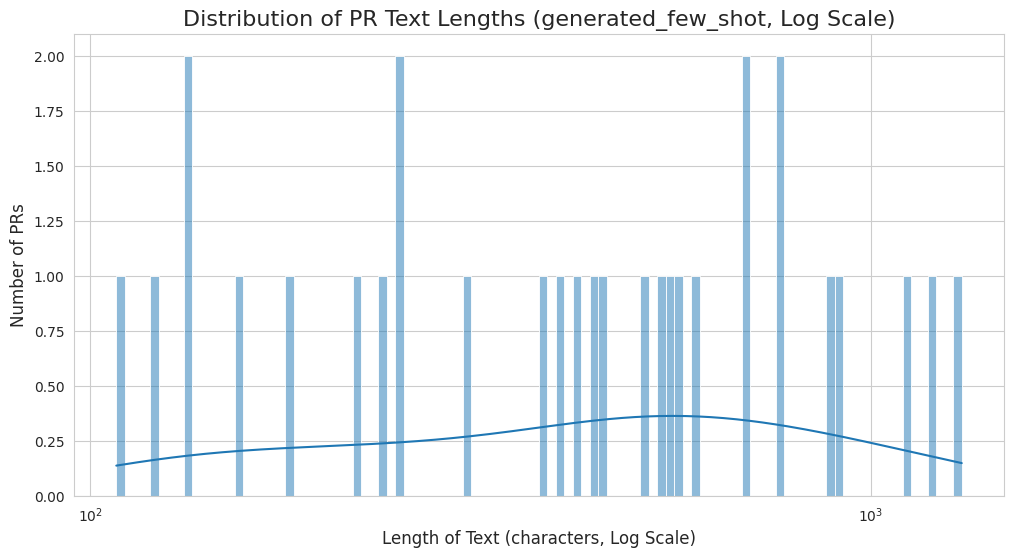

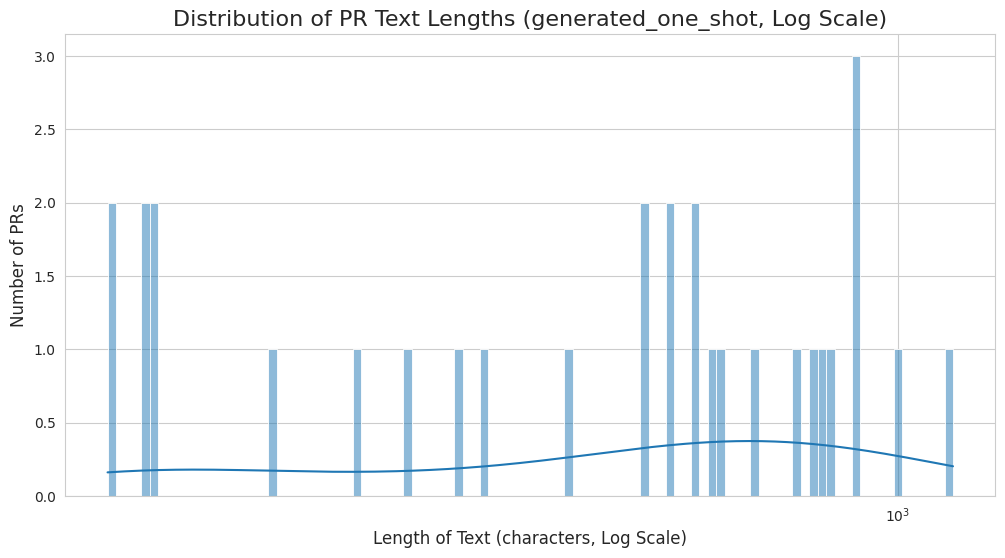

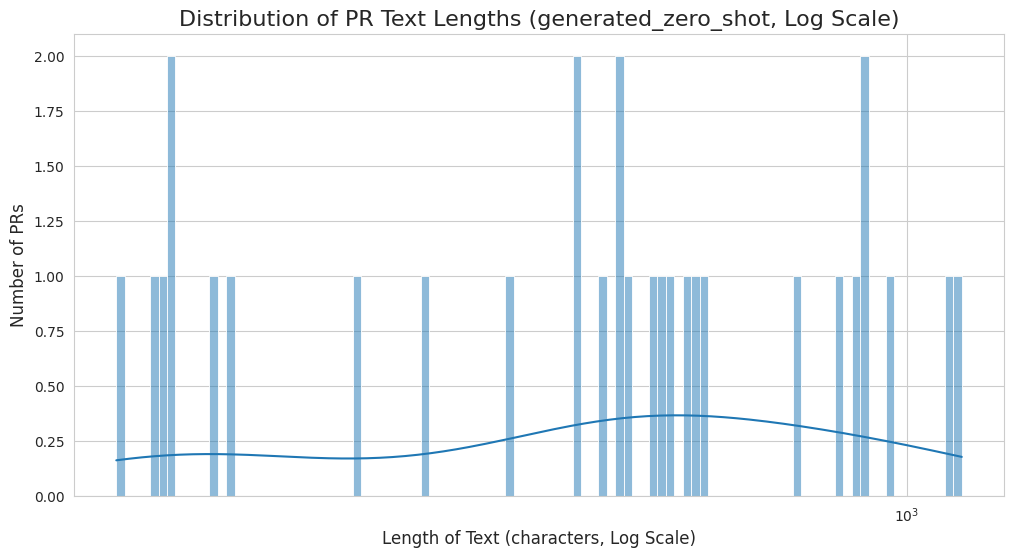

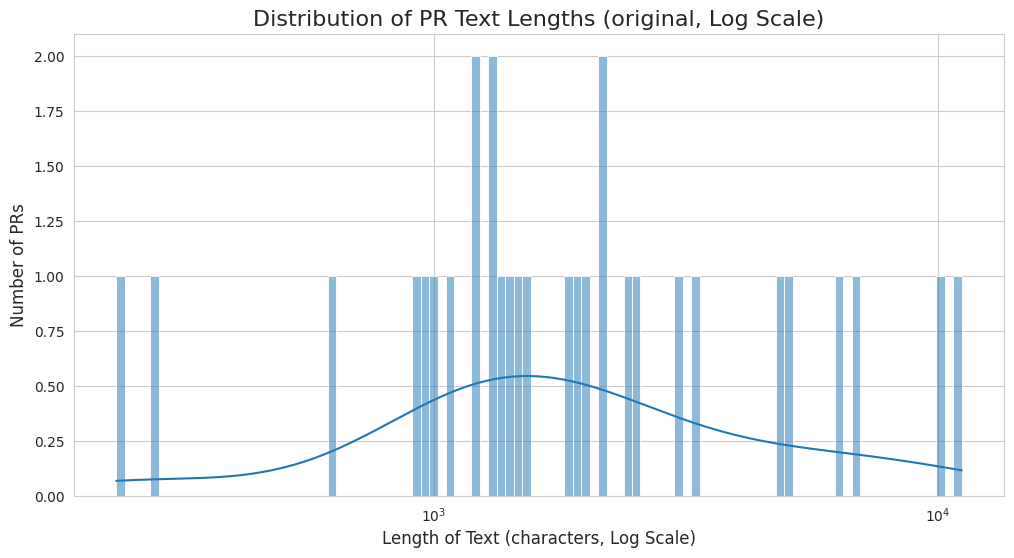

In [11]:
# Plot the distribution of input_text_length for each entry type
for entry_type, df in entry_type_dfs.items():
    plt.figure(figsize=(12, 6))
    sns.histplot(df['input_text_length'], bins=100, log_scale=True, kde=True)
    plt.title(f'Distribution of PR Text Lengths ({entry_type}, Log Scale)', fontsize=16)
    plt.xlabel('Length of Text (characters, Log Scale)', fontsize=12)
    plt.ylabel('Number of PRs', fontsize=12)
    plt.show()

In [12]:
# Define a helper function to safely load JSON, handling potential errors
def safe_loads(json_str):
    try:
        return json.loads(json_str)
    except (json.JSONDecodeError, TypeError):
        # Return an empty dictionary if JSON is invalid or value is not a string
        return {}

# Apply the JSON parsing and extraction to each dataframe in the dictionary
for entry_type, df_original in entry_type_dfs.items():
    # Create a copy to avoid SettingWithCopyWarning
    df = df_original.copy()

    # 1. Parse the JSON strings in the 'zerogpt_response' column
    parsed_json = df['zerogpt_response'].apply(safe_loads)

    # 2. Directly extract the relevant nested fields into new columns
    df['ai_score'] = parsed_json.apply(lambda x: x.get('data', {}).get('fakePercentage', 0))
    df['ai_words'] = parsed_json.apply(lambda x: x.get('data', {}).get('aiWords', 0))
    df['total_words'] = parsed_json.apply(lambda x: x.get('data', {}).get('textWords', 0))
    df['ai_feedback'] = parsed_json.apply(lambda x: x.get('data', {}).get('feedback', 'No feedback'))

    # 3. Fill any remaining missing values
    df['ai_score'] = df['ai_score'].fillna(0)
    df['ai_words'] = df['ai_words'].fillna(0)
    df['total_words'] = df['total_words'].fillna(0)
    df['ai_feedback'] = df['ai_feedback'].fillna('No feedback')

    # Update the dataframe in the dictionary with the modified copy
    entry_type_dfs[entry_type] = df

    print(f"\nJSON data has been successfully integrated into the {entry_type} DataFrame.")

    # Display the DataFrame with the new columns
    display(df[['id', 'repository_name_with_owner', 'ai_score', 'ai_words', 'total_words', 'ai_feedback']].head())


JSON data has been successfully integrated into the generated_few_shot DataFrame.


,id,repository_name_with_owner,ai_score,ai_words,total_words,ai_feedback
0,PR_kwDOAQ0TF85-Zpgh,JabRef/jabref,0.0,0,113,Your Text is Human Written
1,PR_kwDOAQ0TF86QCqNS,JabRef/jabref,0.0,0,47,Your Text is Human Written
2,PR_kwDOAQ0TF85AEMio,JabRef/jabref,100.0,39,39,Your Text is AI/GPT Generated
3,PR_kwDOAQ0TF85KWoT2,JabRef/jabref,0.0,0,23,"Your Text contains mixed signals, with some pa..."
4,PR_kwDOAQ0TF85eDAbJ,JabRef/jabref,0.0,0,36,Your Text is Human Written



JSON data has been successfully integrated into the generated_one_shot DataFrame.


,id,repository_name_with_owner,ai_score,ai_words,total_words,ai_feedback
0,PR_kwDOAQ0TF85-Zpgh,JabRef/jabref,0.0,0,117,Your Text is Human Written
1,PR_kwDOAQ0TF86QCqNS,JabRef/jabref,0.0,0,45,Your Text is Human Written
2,PR_kwDOAQ0TF85AEMio,JabRef/jabref,100.0,47,47,"Your Text contains mixed signals, with some pa..."
3,PR_kwDOAQ0TF85KWoT2,JabRef/jabref,0.0,0,20,"Your Text contains mixed signals, with some pa..."
4,PR_kwDOAQ0TF85eDAbJ,JabRef/jabref,0.0,0,54,Your Text is Human Written



JSON data has been successfully integrated into the generated_zero_shot DataFrame.


,id,repository_name_with_owner,ai_score,ai_words,total_words,ai_feedback
0,PR_kwDOAQ0TF85-Zpgh,JabRef/jabref,0.0,0,76,Your Text is Human Written
1,PR_kwDOAQ0TF86QCqNS,JabRef/jabref,0.0,0,58,Your Text is Human Written
2,PR_kwDOAQ0TF85AEMio,JabRef/jabref,100.0,58,58,Your Text is AI/GPT Generated
3,PR_kwDOAQ0TF85KWoT2,JabRef/jabref,0.0,0,19,"Your Text contains mixed signals, with some pa..."
4,PR_kwDOAQ0TF85eDAbJ,JabRef/jabref,0.0,0,24,Your Text is Human Written



JSON data has been successfully integrated into the original DataFrame.


,id,repository_name_with_owner,ai_score,ai_words,total_words,ai_feedback
0,PR_kwDOAQ0TF85-Zpgh,JabRef/jabref,18.12,53,258,Your Text is Most Likely Human written
1,PR_kwDOAQ0TF86QCqNS,JabRef/jabref,19.57,56,213,Your Text is Human Written
2,PR_kwDOAQ0TF85AEMio,JabRef/jabref,87.66,206,235,Your Text is AI/GPT Generated
3,PR_kwDOAQ0TF85KWoT2,JabRef/jabref,84.93,658,772,Your Text is AI/GPT Generated
4,PR_kwDOAQ0TF85eDAbJ,JabRef/jabref,0.00,0,51,Your Text is Human Written


**Prevalence Analysis**


--- AI Score Analysis (generated_few_shot) ---


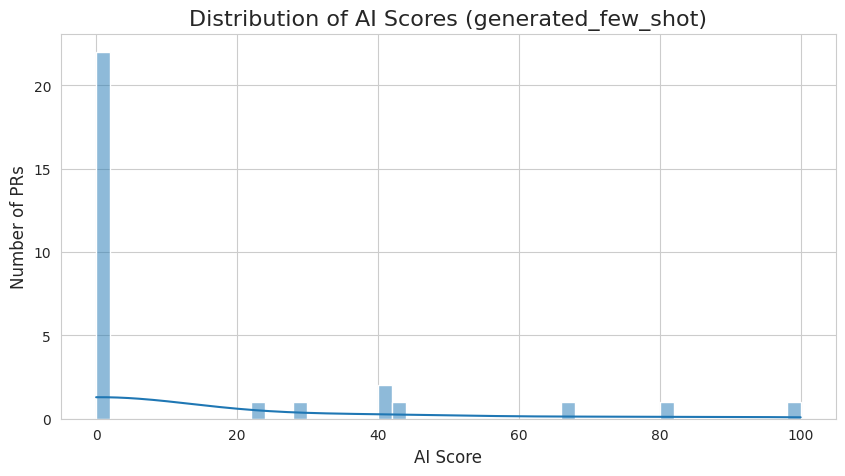


Distribution of PRs by AI Class (generated_few_shot):
ai_class
Human        73.333333
Mixed        16.666667
Likely AI    10.000000
Name: proportion, dtype: float64

--- AI Score Analysis (generated_one_shot) ---


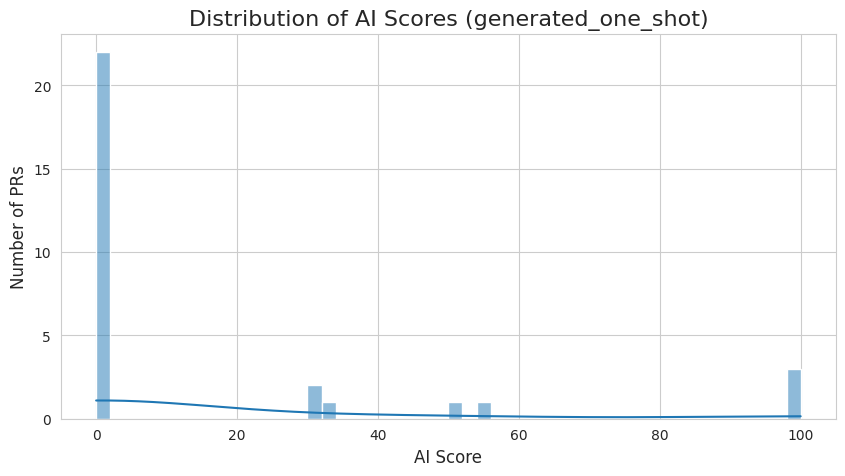


Distribution of PRs by AI Class (generated_one_shot):
ai_class
Human        73.333333
Likely AI    16.666667
Mixed        10.000000
Name: proportion, dtype: float64

--- AI Score Analysis (generated_zero_shot) ---


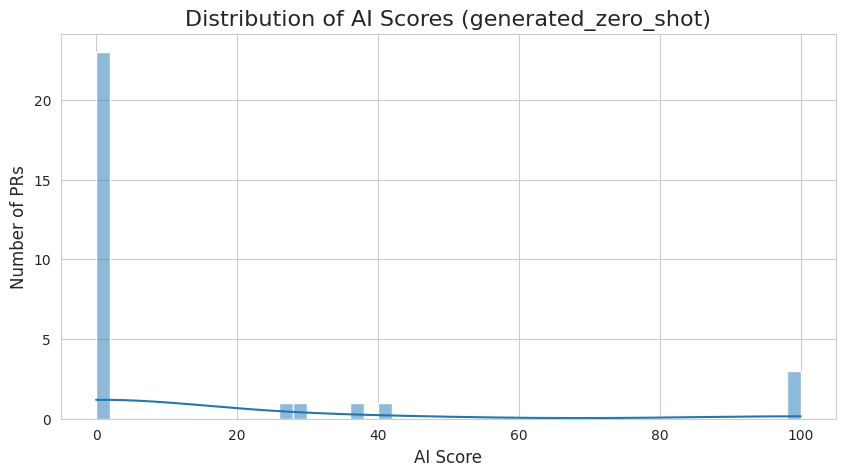


Distribution of PRs by AI Class (generated_zero_shot):
ai_class
Human        76.666667
Mixed        13.333333
Likely AI    10.000000
Name: proportion, dtype: float64

--- AI Score Analysis (original) ---


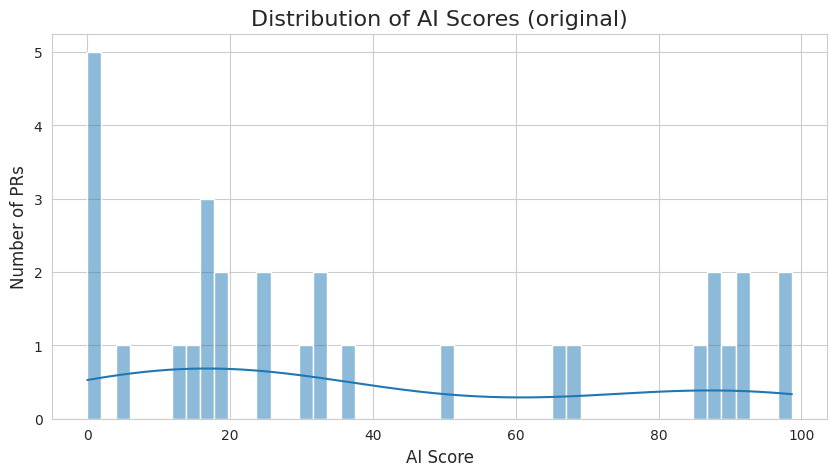


Distribution of PRs by AI Class (original):
ai_class
Mixed        43.333333
Likely AI    36.666667
Human        20.000000
Name: proportion, dtype: float64


In [13]:
# Define a function to classify AI scores
def classify_ai_score(score):
    if score < 10:
        return 'Human'
    elif score <= 50:
        return 'Mixed'
    else:
        return 'Likely AI'

# Apply the analysis and plotting to each dataframe in the dictionary
for entry_type, df in entry_type_dfs.items():
    print(f"\n--- AI Score Analysis ({entry_type}) ---")

    # A histogram of the continuous AI scores
    plt.figure(figsize=(10, 5))
    sns.histplot(df['ai_score'], bins=50, kde=True)
    plt.title(f'Distribution of AI Scores ({entry_type})', fontsize=16)
    plt.xlabel('AI Score', fontsize=12)
    plt.ylabel('Number of PRs', fontsize=12)
    plt.show()

    # create the classification column
    df['ai_class'] = df['ai_score'].apply(classify_ai_score)

    # Get the percentage breakdown of the discrete classes
    class_distribution = df['ai_class'].value_counts(normalize=True) * 100
    print(f"\nDistribution of PRs by AI Class ({entry_type}):")
    print(class_distribution)

In [14]:
for entry_type, df in entry_type_dfs.items():
    feedback_counts = df['ai_feedback'].value_counts()

    print("\n" + "="*50 + "\n")
    print(f"--- Unique Feedback Types and Their Frequencies ({entry_type}) ---")
    print(feedback_counts)



--- Unique Feedback Types and Their Frequencies (generated_few_shot) ---
ai_feedback
Your Text is Human Written                                                       20
Your Text is AI/GPT Generated                                                     3
Your Text contains mixed signals, with some parts generated by AI/GPT             3
Your Text is Most Likely Human written, may include parts generated by AI/GPT     2
Your Text is Likely Human written, may include parts generated by AI/GPT          2
Name: count, dtype: int64


--- Unique Feedback Types and Their Frequencies (generated_one_shot) ---
ai_feedback
Your Text is Human Written                                                       19
Your Text contains mixed signals, with some parts generated by AI/GPT             5
Your Text is Most Likely Human written, may include parts generated by AI/GPT     3
Your Text is Likely Human written, may include parts generated by AI/GPT          2
Your Text is AI/GPT Generated               

In [17]:
# Compare classifications: threshold-based classification (ai_class) and the tool's built-in feedback (ai_feedback)
import pandas as pd

def classify_feedback_detailed(feedback_text: str) -> str:
    """
    Maps all 9 known raw feedback strings to a granular category.
    The order of checks is structured to handle specific phrases first.
    """
    if not isinstance(feedback_text, str):
        return "Unknown (Invalid Input)"

    # Normalize the text for easier matching
    lower_text = feedback_text.lower()

    # --- Rule 1: Handle MIXED signals first, as they are most specific ---
    if "most likely human written, may include parts" in lower_text:
        return "Human-Dominant (Mixed)"
    if "likely human written, may include parts" in lower_text:
        return "Human-Dominant (Mixed)"
    if "contains mixed signals" in lower_text:
        return "Balanced (Mixed)"
    if "most of your text is ai/gpt generated" in lower_text:
        return "AI-Dominant (Mixed)"

    # --- Rule 2: Handle high-confidence ("Most Likely") classifications ---
    if "most likely ai/gpt generated" in lower_text:
        return "Strongly AI"
    if "most likely human written" in lower_text:
        return "Strongly Human"

    # --- Rule 3: Handle standard-confidence ("Likely" or direct) classifications ---
    if "likely generated by ai/gpt" in lower_text:
        return "Likely AI"
    if "is ai/gpt generated" in lower_text: # Catches "Your Text is AI/GPT Generated"
        return "Likely AI"
    if "is human written" in lower_text: # Catches "Your Text is Human Written"
        return "Likely Human"

    # --- Rule 4: Fallback for anything else ---
    return "Unknown"

# The simplified mapping function remains the same
def map_to_simplified_class(detailed_class: str) -> str:
    """Converts the detailed classification into a simplified three-tier system."""
    if detailed_class in ["Strongly AI", "Likely AI"]:
        return "Likely AI"
    elif "Mixed" in detailed_class: # This handles all "Mixed" variants
        return "Mixed"
    elif detailed_class in ["Strongly Human", "Likely Human"]:
        return "Human"
    else:
        return "Unknown"


# Apply the comparison to each dataframe in the dictionary
for entry_type, df in entry_type_dfs.items():
    print(f"\n--- Comparison for {entry_type} ---")
    # Create a new column with the cleaned feedback labels
    df['detailed_classification'] = df['ai_feedback'].apply(classify_feedback_detailed)
    df['feedback_class'] = df['detailed_classification'].apply(map_to_simplified_class)

    # Create the confusion matrix to compare the two classification methods
    confusion_matrix = pd.crosstab(
        df['ai_class'],
        df['feedback_class'],
        rownames=['Threshold-Based Classification (ai_class)'],
        colnames=['Tool\'s Feedback (feedback_class)']
    )

    print("--- Comparison of Classification Methods (Counts) ---")
    print(confusion_matrix)

    # You can also view this as percentages
    confusion_matrix_percent = pd.crosstab(
        df['ai_class'],
        df['feedback_class'],
        rownames=['Threshold-Based Classification (ai_class)'],
        colnames=['Tool\'s Feedback (feedback_class)'],
        normalize='all' # Normalize over all values
    )

    print("\n--- Comparison of Classification Methods (Percentages) ---")
    print((confusion_matrix_percent * 100).round(2))


--- Comparison for generated_few_shot ---
--- Comparison of Classification Methods (Counts) ---
Tool's Feedback (feedback_class)           Human  Likely AI  Mixed
Threshold-Based Classification (ai_class)                         
Human                                         20          0      2
Likely AI                                      0          2      1
Mixed                                          0          1      4

--- Comparison of Classification Methods (Percentages) ---
Tool's Feedback (feedback_class)           Human  Likely AI  Mixed
Threshold-Based Classification (ai_class)                         
Human                                      66.67       0.00   6.67
Likely AI                                   0.00       6.67   3.33
Mixed                                       0.00       3.33  13.33

--- Comparison for generated_one_shot ---
--- Comparison of Classification Methods (Counts) ---
Tool's Feedback (feedback_class)           Human  Likely AI  Mixed
Threshold


--- Count Plots for generated_few_shot ---


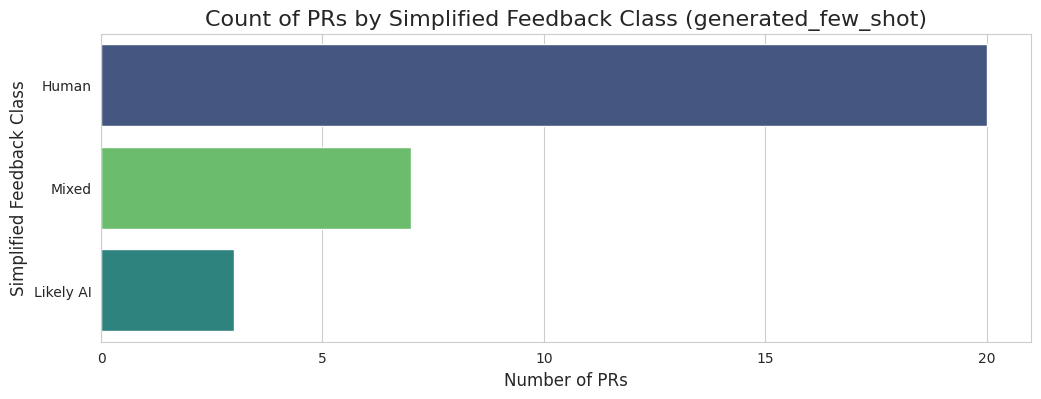

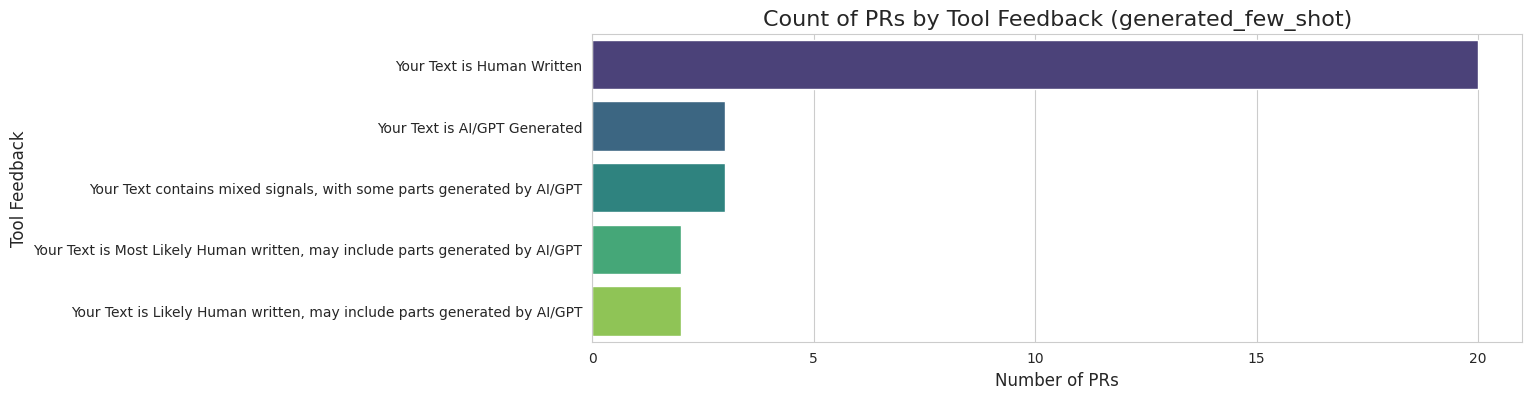


--- Count Plots for generated_one_shot ---


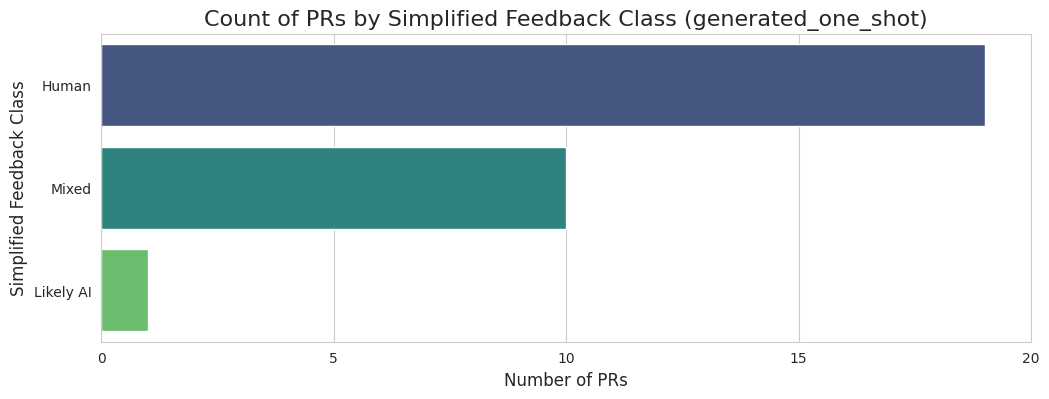

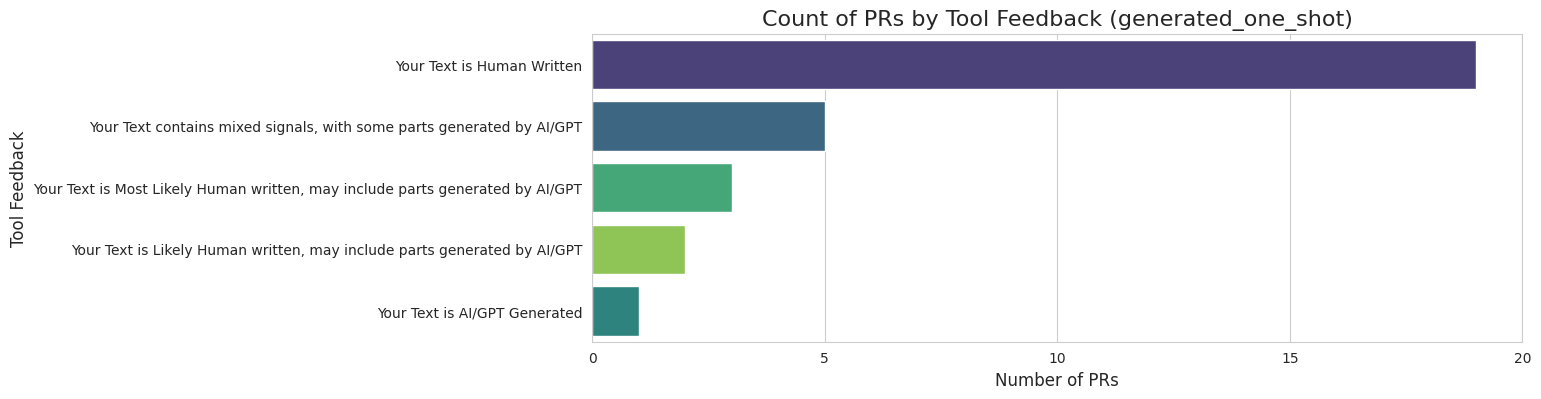


--- Count Plots for generated_zero_shot ---


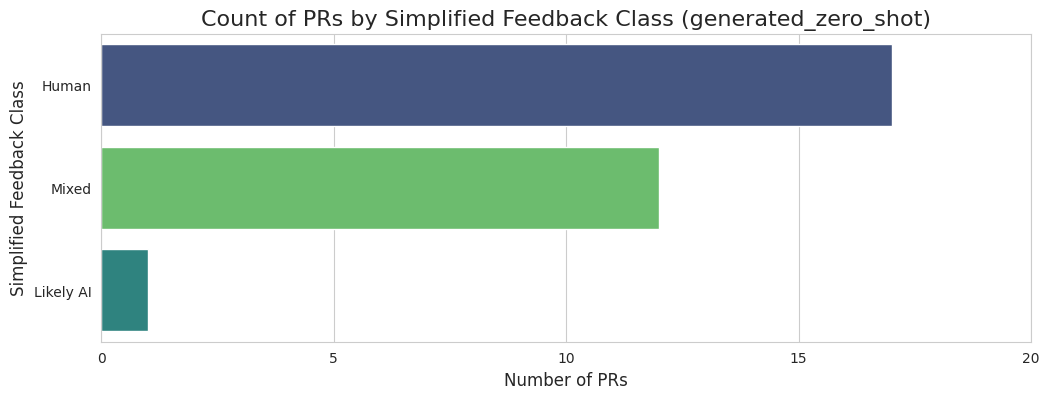

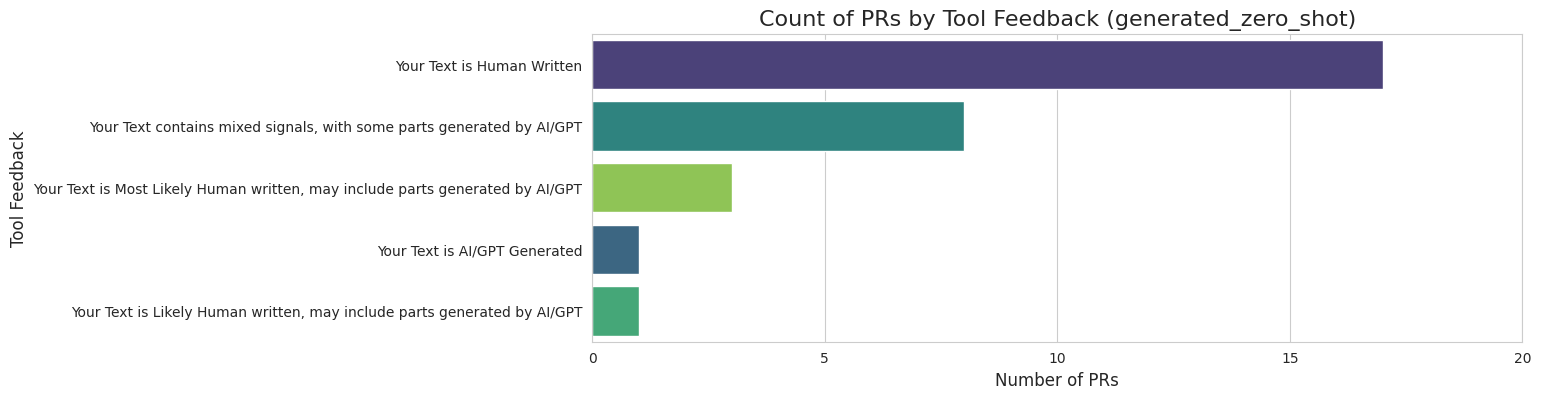


--- Count Plots for original ---


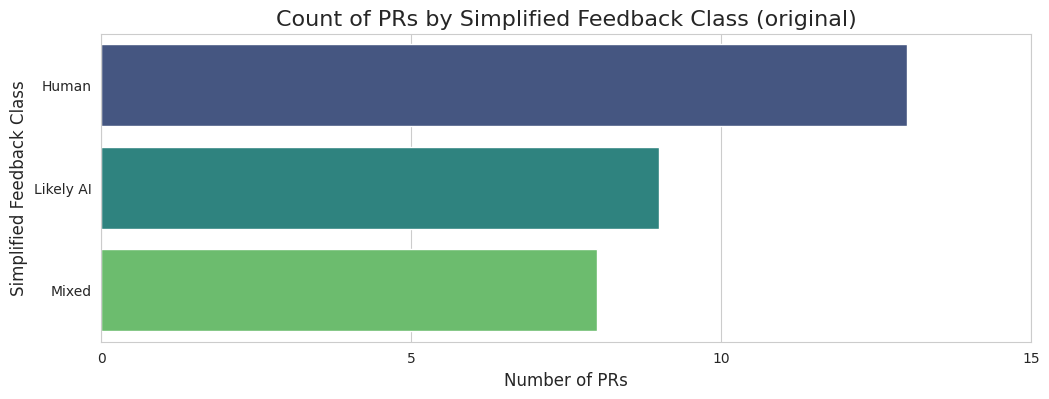

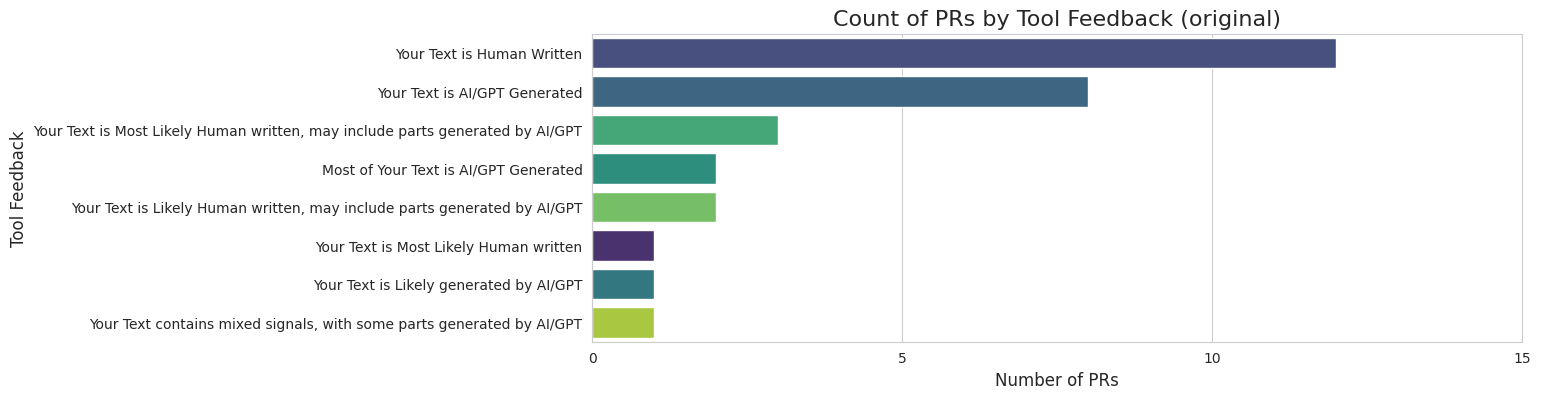

In [16]:
import numpy as np

for entry_type, df in entry_type_dfs.items():
    print(f"\n--- Count Plots for {entry_type} ---")

    plt.figure(figsize=(12, 4))
    ax = sns.countplot(y='feedback_class', data=df, order=df['feedback_class'].value_counts().index, palette='viridis', hue='feedback_class', legend=False)
    ax.set_xticks(np.arange(0, max(df['feedback_class'].value_counts().values) + 5, 5))
    plt.title(f'Count of PRs by Simplified Feedback Class ({entry_type})', fontsize=16)
    plt.xlabel('Number of PRs', fontsize=12)
    plt.ylabel('Simplified Feedback Class', fontsize=12)
    plt.show()

    plt.figure(figsize=(12, 4))
    ax = sns.countplot(y='ai_feedback', data=df, order=df['ai_feedback'].value_counts().index, palette='viridis', hue='ai_feedback', legend=False)
    ax.set_xticks(np.arange(0, max(df['ai_feedback'].value_counts().values) + 5, 5))
    plt.title(f'Count of PRs by Tool Feedback ({entry_type})', fontsize=16)
    plt.xlabel('Number of PRs', fontsize=12)
    plt.ylabel('Tool Feedback', fontsize=12)
    plt.show()


--- Tool Feedback Summary for generated_few_shot ---


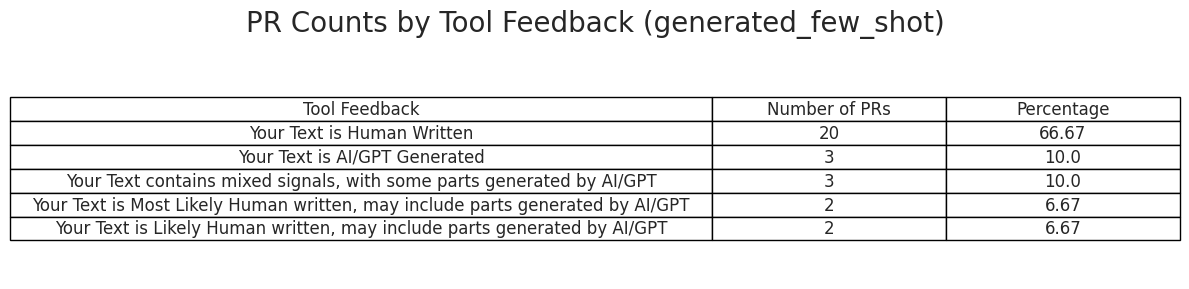


--- Tool Feedback Summary for generated_one_shot ---


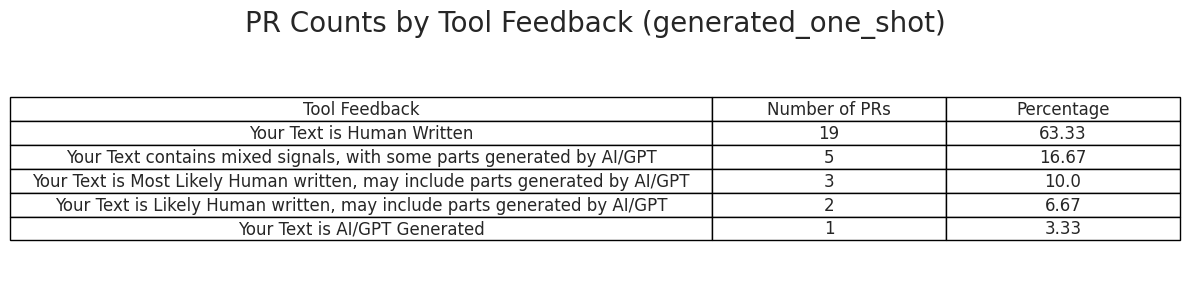


--- Tool Feedback Summary for generated_zero_shot ---


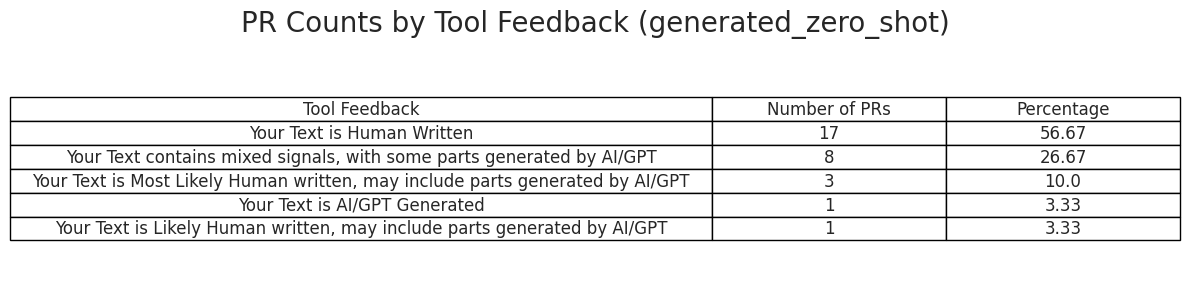


--- Tool Feedback Summary for original ---


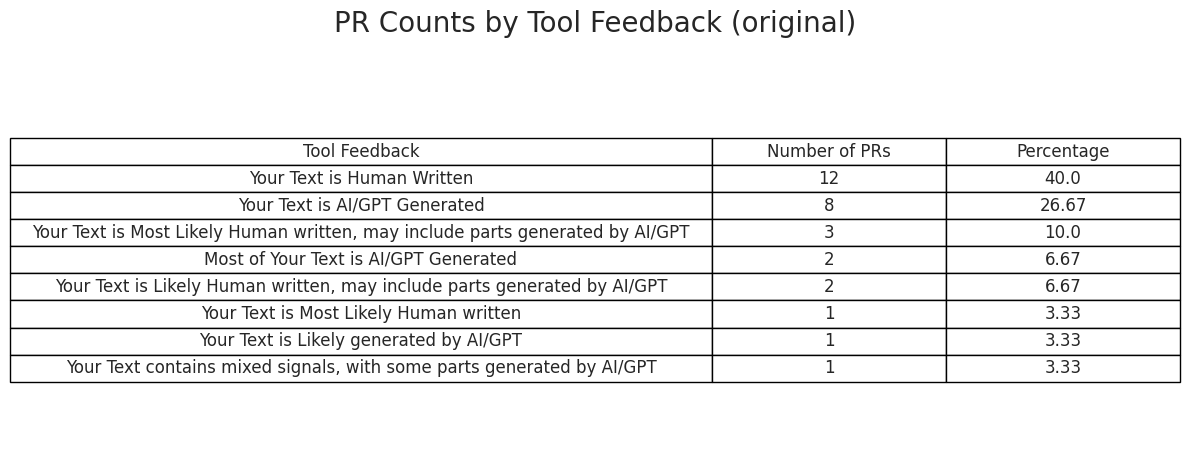

In [18]:
import numpy as np

for entry_type, df in entry_type_dfs.items():
    ai_feedback_counts = df['ai_feedback'].value_counts().reset_index()
    ai_feedback_counts.columns = ['Tool Feedback', 'Number of PRs']
    ai_feedback_counts['Percentage'] = (
        ai_feedback_counts['Number of PRs'] / ai_feedback_counts['Number of PRs'].sum() * 100
    ).round(2)

    print(f"\n--- Tool Feedback Summary for {entry_type} ---")
    # Render as image
    fig, ax = plt.subplots(figsize=(12, len(ai_feedback_counts) * 0.6))
    ax.axis('off')

    # Define column widths (relative) - adjust as needed
    col_widths = [0.6, 0.2, 0.2] # Proportion for 'Tool Feedback', 'Number of PRs', 'Percentage'

    table = ax.table(
        cellText=ai_feedback_counts.values,
        colLabels=ai_feedback_counts.columns,
        loc='center',
        cellLoc='center',
        colLoc='center',
        colWidths=col_widths # Set column widths
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    plt.title(f"PR Counts by Tool Feedback ({entry_type})", fontsize=20, pad=20)
    plt.tight_layout()
    plt.show()


--- Simplified Feedback Class Summary for generated_few_shot ---


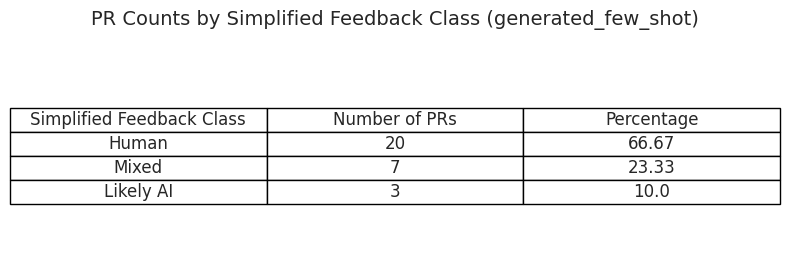


--- Simplified Feedback Class Summary for generated_one_shot ---


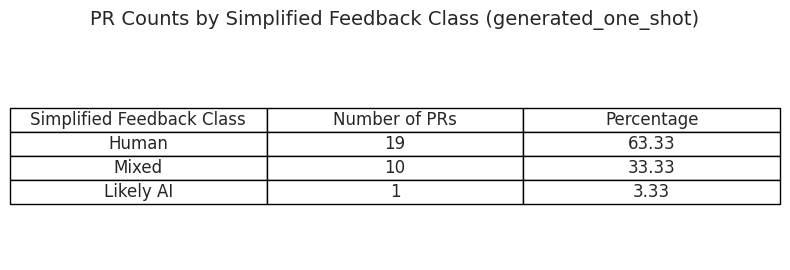


--- Simplified Feedback Class Summary for generated_zero_shot ---


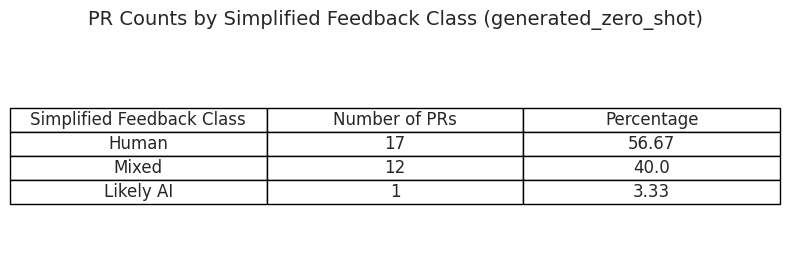


--- Simplified Feedback Class Summary for original ---


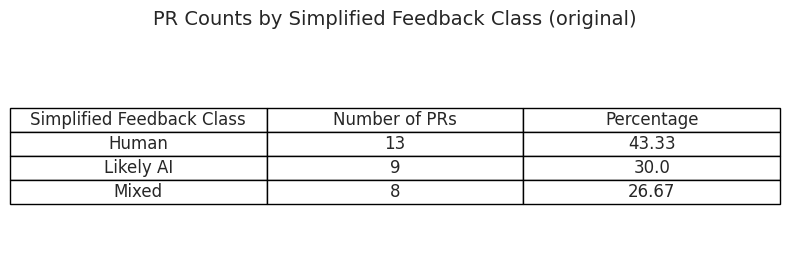

In [19]:
import numpy as np

for entry_type, df in entry_type_dfs.items():
    # Get counts and percentages for feedback_class
    feedback_class_counts = df['feedback_class'].value_counts().reset_index()
    feedback_class_counts.columns = ['Simplified Feedback Class', 'Number of PRs']
    feedback_class_counts['Percentage'] = (
        feedback_class_counts['Number of PRs'] / feedback_class_counts['Number of PRs'].sum() * 100
    ).round(2)

    print(f"\n--- Simplified Feedback Class Summary for {entry_type} ---")
    # Create a figure and render the table
    fig, ax = plt.subplots(figsize=(8, len(feedback_class_counts) * 0.6 + 1))  # dynamic height
    ax.axis('off')  # Hide axes

    # Create table
    table = ax.table(
        cellText=feedback_class_counts.values,
        colLabels=feedback_class_counts.columns,
        loc='center',
        cellLoc='center',
        colLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)  # Adjust cell size

    plt.title(f"PR Counts by Simplified Feedback Class ({entry_type})", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

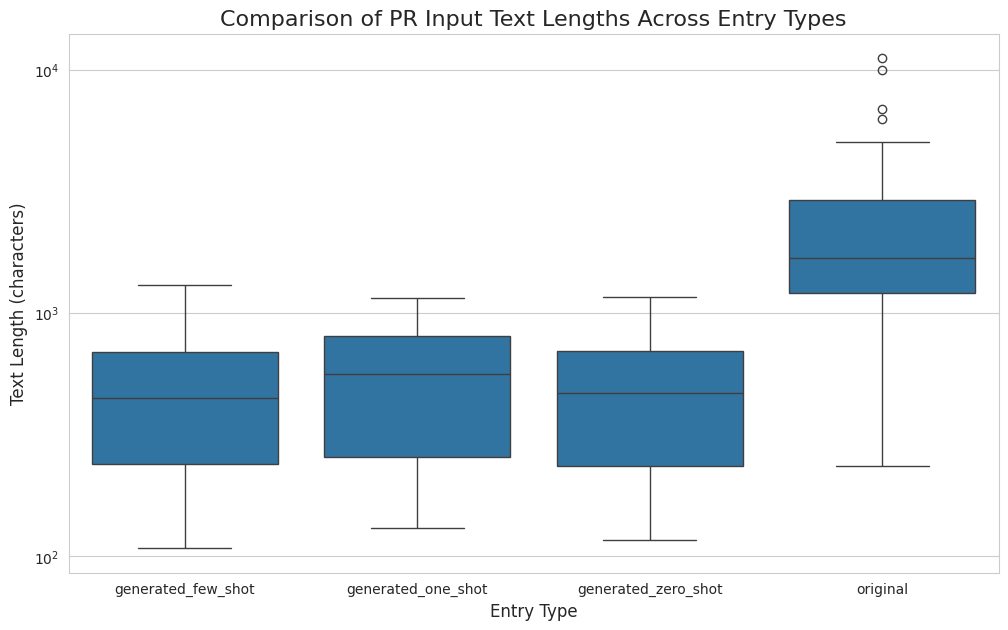

In [20]:
# Combine all dataframes into a single dataframe for plotting
combined_df = pd.concat(entry_type_dfs.values(), ignore_index=True)

# Plot the comparison of input text length across entry types
plt.figure(figsize=(12, 7))
sns.boxplot(x='entry_type', y='input_text_length', data=combined_df)
plt.title('Comparison of PR Input Text Lengths Across Entry Types', fontsize=16)
plt.xlabel('Entry Type', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.yscale('log')  # Apply log scale to the y-axis for better visualization

plt.show()

In [23]:
# Calculate summary statistics for input_text_length grouped by entry_type
text_length_summary = combined_df.groupby('entry_type')['input_text_length'].describe().reset_index()

# Rename the 'entry_type' column for clarity
text_length_summary = text_length_summary.rename(columns={'entry_type': 'Entry Type'})

# Calculate percentage difference in mean text length compared to 'original'
original_mean_length = text_length_summary[text_length_summary['Entry Type'] == 'original']['mean'].iloc[0]

text_length_summary['Percentage Difference from Original Mean'] = (
    (text_length_summary['mean'] - original_mean_length) / original_mean_length * 100
).round(2)

print("--- Summary Statistics of PR Input Text Lengths by Entry Type ---")
display(text_length_summary)

--- Summary Statistics of PR Input Text Lengths by Entry Type ---


,Entry Type,count,mean,std,min,25%,50%,75%,max,Percentage Difference from Original Mean
0,generated_few_shot,30.0,507.633333,330.907267,108.0,238.50,448.0,693.75,1307.0,-81.32
1,generated_one_shot,30.0,535.400000,301.239234,131.0,256.75,559.0,800.25,1152.0,-80.30
2,generated_zero_shot,30.0,504.600000,308.512963,117.0,235.75,467.5,696.50,1161.0,-81.43
3,original,30.0,2718.000000,2695.185286,235.0,1202.75,1688.5,2909.75,11153.0,0.00


--- Mean and Median PR Input Text Lengths by Entry Type ---


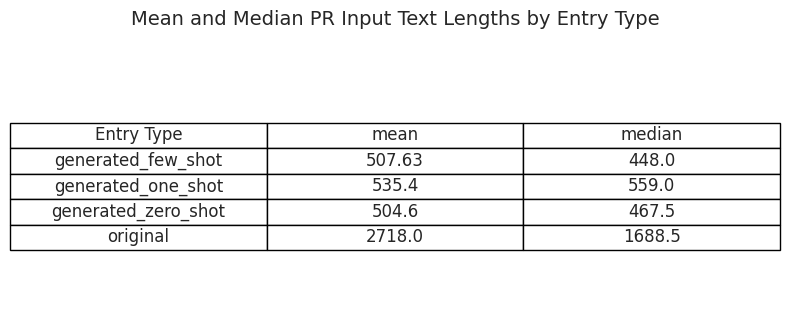

In [25]:
# Extract relevant columns for the table
mean_median_summary = text_length_summary[['Entry Type', 'mean', '50%']].copy()

# Rename the columns for clarity
mean_median_summary = mean_median_summary.rename(columns={'Entry Type': 'Entry Type', '50%': 'median'})

# Approximate mean and median to 2 decimal places
mean_median_summary['mean'] = mean_median_summary['mean'].round(2)
mean_median_summary['median'] = mean_median_summary['median'].round(2)


print("--- Mean and Median PR Input Text Lengths by Entry Type ---")

# Create a figure and render the table
fig, ax = plt.subplots(figsize=(8, len(mean_median_summary) * 0.6 + 1))  # dynamic height
ax.axis('off')  # Hide axes

# Create table
table = ax.table(
    cellText=mean_median_summary.values,
    colLabels=mean_median_summary.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust cell size

plt.title("Mean and Median PR Input Text Lengths by Entry Type", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [27]:
# Define the columns to correlate with input text length
columns_to_correlate = ['commits_count', 'changed_files_count', 'additions_count', 'deletions_count']

# Calculate the correlation matrix
correlation_matrix = combined_df[['input_text_length'] + columns_to_correlate].corr()

# Extract the correlations with input_text_length
correlation_with_length = correlation_matrix['input_text_length'][columns_to_correlate].reset_index()
correlation_with_length.columns = ['Metric', 'Correlation with Input Text Length']

print("--- Correlation between Input Text Length and Key PR Metrics ---")
display(correlation_with_length)

--- Correlation between Input Text Length and Key PR Metrics ---


,Metric,Correlation with Input Text Length
0,commits_count,-0.023079
1,changed_files_count,-0.051861
2,additions_count,-0.017044
3,deletions_count,-0.043602


In [29]:
# In a new cell, run this command first to install the library
!pip install nltk
!pip install wordcloud


In [30]:
import nltk

# Download the 'punkt' package for tokenization (splitting text into words)
nltk.download('punkt')

# Download the 'stopwords' package for the list of common words to remove
nltk.download('stopwords')

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True


--- Word Cloud for generated_few_shot ---


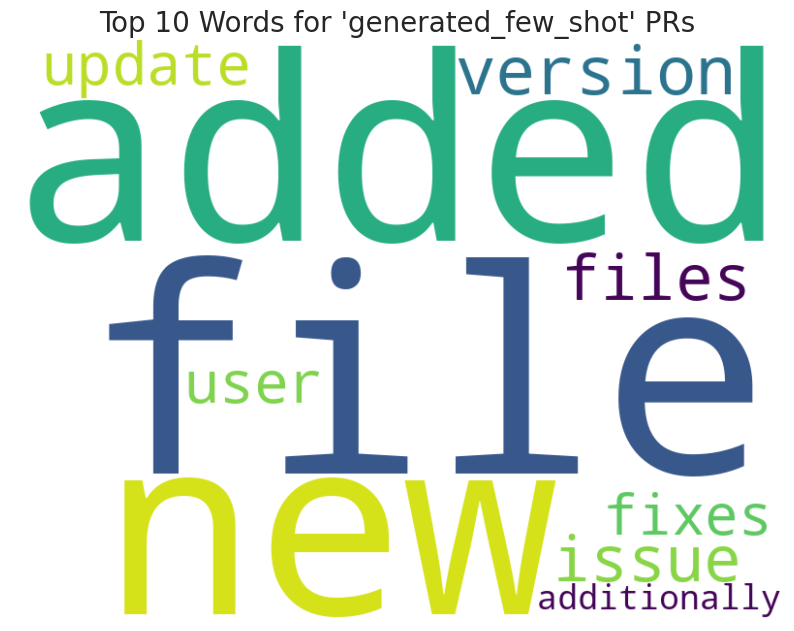


--- Word Cloud for generated_one_shot ---


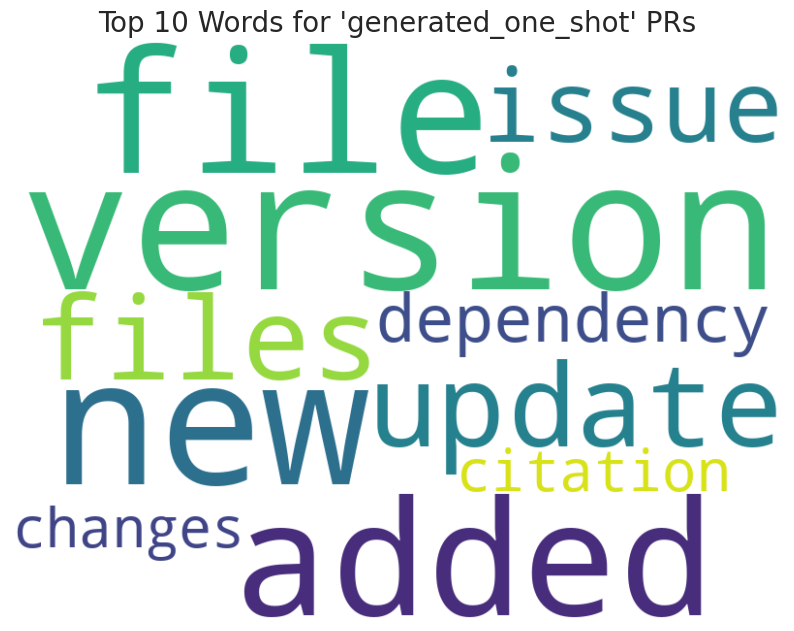


--- Word Cloud for generated_zero_shot ---


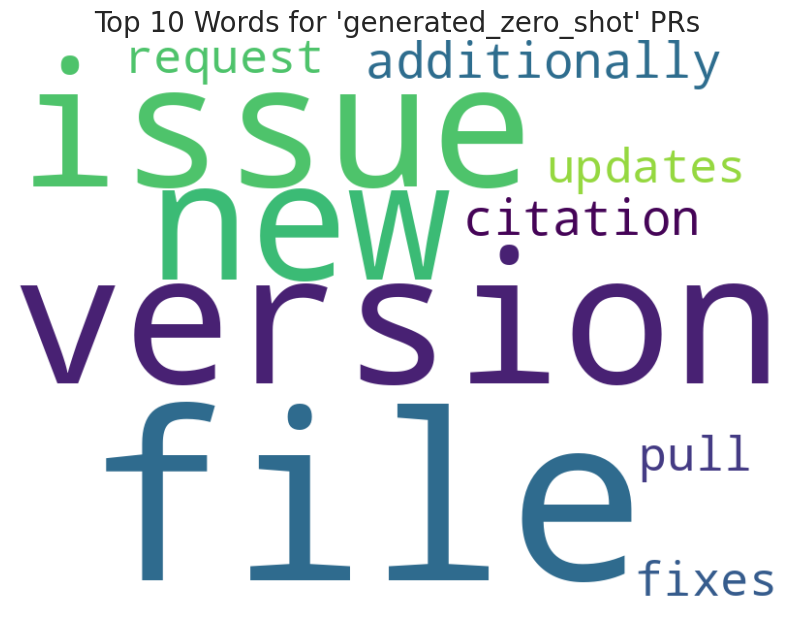


--- Word Cloud for original ---


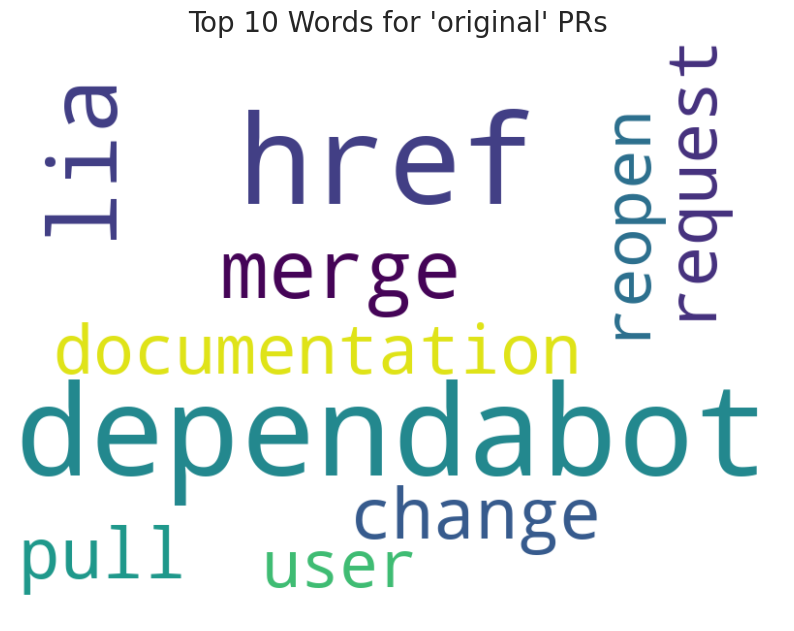

In [31]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure NLTK resources are downloaded (if not already)
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')


# --- 1. Define Text Preprocessing Function ---
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if not isinstance(text, str): return []
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # Remove stop words and short words
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_tokens

# --- Apply preprocessing to each dataframe in the dictionary ---
for entry_type, df_original in entry_type_dfs.items():
    # Create a copy to avoid SettingWithCopyWarning
    df = df_original.copy()
    # Apply the preprocessing
    df['processed_tokens'] = df['input_text'].apply(preprocess_text)
    # Update the dataframe in the dictionary
    entry_type_dfs[entry_type] = df


# --- 2. Generate Word Clouds for each Entry Type ---

for entry_type, df in entry_type_dfs.items():
    print(f"\n--- Word Cloud for {entry_type} ---")

    # Get all tokens for the current entry type
    all_tokens = [token for tokens_list in df['processed_tokens'] for token in tokens_list]

    if not all_tokens:
        print(f"No data for entry type '{entry_type}'.")
        continue

    # Get top 10 word frequencies
    word_counts = Counter(all_tokens)
    top_10_words = dict(word_counts.most_common(10)) # Convert list of tuples to dictionary

    # Generate the word cloud from the frequency dictionary
    wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='viridis').generate_from_frequencies(top_10_words)

    # Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top 10 Words for '{entry_type}' PRs", fontsize=20)
    plt.axis("off")
    plt.show()

In [32]:
# Get the dataframes for 'original' and 'generated_few_shot'
original_df = entry_type_dfs['original']
few_shot_df = entry_type_dfs['generated_few_shot']

# Select the 'id', 'title', 'input_text', 'url', and 'ai_feedback' columns and take 3 random examples
# Use .sample() with a fixed random_state for reproducibility if needed, otherwise remove random_state
original_examples = original_df[['id', 'title', 'input_text', 'url', 'ai_feedback']].sample(n=3, random_state=42).copy()
few_shot_examples = few_shot_df[['id', 'title', 'input_text', 'url', 'ai_feedback']].sample(n=3, random_state=42).copy()

# Add a column to indicate the entry type
original_examples['Entry Type'] = 'original'
few_shot_examples['Entry Type'] = 'generated_few_shot'

# Reorder columns for better readability
original_examples = original_examples[['Entry Type', 'id', 'title', 'input_text', 'url', 'ai_feedback']]
few_shot_examples = few_shot_examples[['Entry Type', 'id', 'title', 'input_text', 'url', 'ai_feedback']]

# Combine the examples into a single dataframe
comparison_examples = pd.concat([original_examples, few_shot_examples], ignore_index=True)

print("--- Examples of Title, Description, URL, and Tool Feedback from Random Original and Generated Few-Shot PRs ---")
display(comparison_examples)

--- Examples of Title, Description, URL, and Tool Feedback from Random Original and Generated Few-Shot PRs ---


,Entry Type,id,title,input_text,url,ai_feedback
0,original,PR_kwDOAQ0TF86MuOZZ,Show compound patterns in the dropdown for cit...,### Follow-up for #12516 \n\nThis PR enhances ...,https://github.com/JabRef/jabref/pull/12580,Your Text is Human Written
1,original,MDExOlB1bGxSZXF1ZXN0MjQwNzI2NDU2,Bump wiremock from 2.19.0 to 2.20.0,Bumps [wiremock](https://github.com/tomakehurs...,https://github.com/JabRef/jabref/pull/4550,Most of Your Text is AI/GPT Generated
2,original,PR_kwDOAQ0TF86cvynI,Bump com.github.jknack:handlebars-helpers from...,Bumps [com.github.jknack:handlebars-helpers](h...,https://github.com/JabRef/jabref/pull/13416,Your Text is AI/GPT Generated
3,generated_few_shot,PR_kwDOAQ0TF86MuOZZ,Show compound patterns in the dropdown for cit...,Enhance the citation key pattern suggestion dr...,https://github.com/JabRef/jabref/pull/12580,Your Text is Human Written
4,generated_few_shot,MDExOlB1bGxSZXF1ZXN0MjQwNzI2NDU2,Bump wiremock from 2.19.0 to 2.20.0,Bumps the WireMock dependency from version 2.1...,https://github.com/JabRef/jabref/pull/4550,Your Text is Human Written
5,generated_few_shot,PR_kwDOAQ0TF86cvynI,Bump com.github.jknack:handlebars-helpers from...,Bumps the version of com.github.jknack:handleb...,https://github.com/JabRef/jabref/pull/13416,Your Text is Human Written
